<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Computação em Nuvem III
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>AWS EC2;</li>
  <li>AWS SageMaker;</li>
  <li>AWS Acesso Externo.</li>
</ol>

---

# **Exercícios**

## 1\. AWS SageMaker

Replique as atividades do item 2.3 em sua conta.

Objeto para o bucket 'modulo39-higor-ebac'

In [1]:
%%writefile cotacao.csv
date,usd,eur,gbp
2021-01-21,5.4582,6.1896,7.3980
2021-01-20,5.4191,6.1290,7.3673
2021-01-19,5.4383,6.1676,7.3994
2021-01-18,5.5666,6.3042,7.5672

Writing cotacao.csv


Código de leitura

In [ ]:
import boto3
import pandas as pd

BUCKET = 'modulo39-higor-ebac'

df = pd.read_csv(f's3://{BUCKET}/cotacao.csv')
df.head()

Carregando o objeto do bucket no notebok

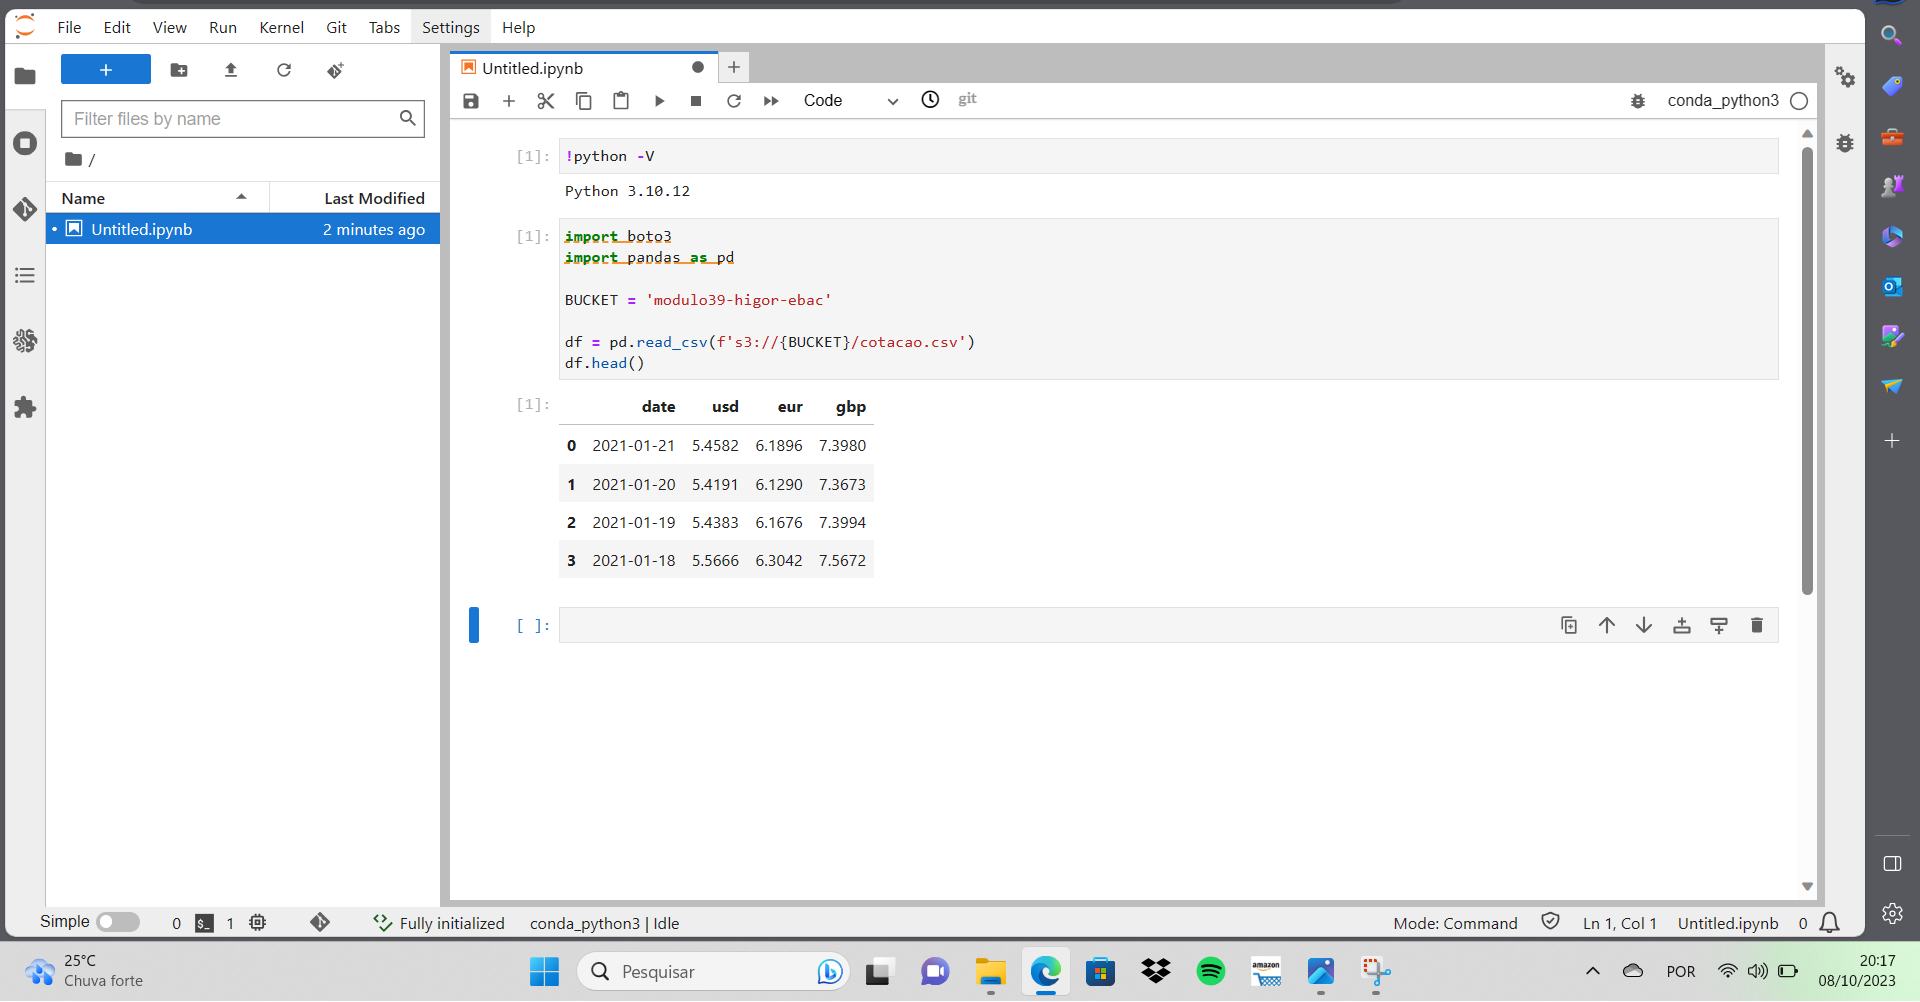

## 2\. AWS Acesso Externo

Replique as atividades do item 3.1 em sua conta.


Instalando boto3

In [2]:
!pip install boto3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.0 MB/s eta 0:00:00


Configurando as credenciais

In [3]:
from getpass import getpass

aws_access_key_id = getpass()

··········


In [4]:
from getpass import getpass

aws_secret_access_key = getpass()

··········


In [5]:
import boto3
import pandas as pd

client = boto3.client('s3', aws_access_key_id=aws_access_key_id, aws_secret_access_key=aws_secret_access_key)

In [6]:
BUCKET = 'modulo39-higor-ebac'

client.download_file(BUCKET, 'cotacao.csv', 'cotacao_aws.csv')

* Extração

In [7]:
df = pd.read_csv('cotacao_aws.csv')
df.head()

,date,usd,eur,gbp
0,2021-01-21,5.4582,6.1896,7.3980
1,2021-01-20,5.4191,6.1290,7.3673
2,2021-01-19,5.4383,6.1676,7.3994
3,2021-01-18,5.5666,6.3042,7.5672


* Carregando

In [8]:
client.upload_file(Filename='cotacao_aws.csv', Bucket=BUCKET, Key='cotacao_aws.csv')

S3UploadFailedError: ignored